In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

In [4]:
sp500_data = pd.read_csv(r"C:\Users\Darshan\Downloads\sp500_2024 (1).csv", index_col = 'Date')
nasdaq100_data = pd.read_csv(r"C:\Users\Darshan\Downloads\nasdaq100_2024 (1).csv", index_col = 'Date')
sp500_data.index = pd.to_datetime(sp500_data.index)
nasdaq100_data.index = pd.to_datetime(nasdaq100_data.index)

sp500_data.head()

,Closing Price
Date,
2017-12-01,2642.219971
2017-12-04,2639.439941
2017-12-05,2629.570068
2017-12-06,2629.270020
2017-12-07,2636.979980


In [5]:
nasdaq100_data.head()

,Closing Price
Date,
2017-12-01,6337.870117
2017-12-04,6263.700195
2017-12-05,6265.109863
2017-12-06,6293.049805
2017-12-07,6316.279785


## Parameters of Analytical VaR

In [3]:
rolling_window = 21 # 21 observations of RETURNS, not DAYS
c = 0.99
inverse_cdf = norm.ppf(1-c)
factor = inverse_cdf
print(f'Exact value of Normal ICDF for p = {1-c:.2f} is:\033[1m{inverse_cdf}\033[0m')

Exact value of Normal ICDF for p = 0.01 is:-2.3263478740408408


In [7]:
sp500_data['LogReturn'] = np.log(sp500_data['Closing Price']) - np.log(sp500_data['Closing Price'].shift(1))
nasdaq100_data['LogReturn'] = np.log(nasdaq100_data['Closing Price']) - np.log(nasdaq100_data['Closing Price'].shift(1))

sp500_data['SD'] = sp500_data['LogReturn'].rolling(rolling_window,min_periods=rolling_window).std()
nasdaq100_data['SD'] = nasdaq100_data['LogReturn'].rolling(rolling_window,min_periods=rolling_window).std()

sp500_data.tail()


,Closing Price,LogReturn,SD
Date,,,
2024-07-23,5555.740234,-0.001559,0.006406
2024-07-24,5427.129883,-0.023421,0.008283
2024-07-25,5399.220215,-0.005156,0.008295
2024-07-26,5459.100098,0.011029,0.008668
2024-07-29,5463.540039,0.000813,0.008667


In [39]:
#VaR 10D & Realised returns

sp500_data['VaR_10D'] = factor * sp500_data['SD'] * np.sqrt(10)
nasdaq100_data['VaR_10D'] = factor * nasdaq100_data['SD'] * np.sqrt(10)

sp500_data['Ret 10D'] = np.log(sp500_data['Closing Price']) - np.log(sp500_data['Closing Price'].shift(-10))
nasdaq100_data['Ret 10D'] = np.log(nasdaq100_data['Closing Price']) - np.log(nasdaq100_data['Closing Price'].shift(-10))

sp500_data['VaR_Breach'] = sp500_data['Ret 10D'] < sp500_data['VaR_10D']
nasdaq100_data['VaR_Breach'] = nasdaq100_data['Ret 10D'] < nasdaq100_data['VaR_10D']

nasdaq100_data.tail(25)

,Closing Price,LogReturn,SD,VaR_10D,Ret 10D,VaR_Breach
Date,,,,,,
2024-06-24,19474.619141,-0.011528,0.008014,-0.058958,-0.049018,False
2024-06-25,19701.130859,0.011564,0.008142,-0.059896,-0.048268,False
2024-06-26,19751.050781,0.002531,0.007973,-0.058653,-0.023038,False
2024-06-27,19789.029297,0.001921,0.007971,-0.058636,-0.027043,False
2024-06-28,19682.869141,-0.005379,0.007880,-0.057972,-0.035143,False
2024-07-01,19812.220703,0.006550,0.007339,-0.053991,-0.029168,False
2024-07-02,20011.890625,0.010028,0.007446,-0.054775,0.010688,False
2024-07-03,20186.630859,0.008694,0.007526,-0.055368,0.024144,False
2024-07-05,20391.970703,0.010121,0.007643,-0.056223,0.043567,False


In [58]:
sp500_data_breach = sp500_data[sp500_data['VaR_Breach'] == True]
nasdaq100_data_breach = nasdaq100_data[nasdaq100_data['VaR_Breach'] == True]
sp500_data_breach

,Closing Price,LogReturn,SD,VaR_10D,Ret 10D,VaR_Breach
Date,,,,,,
2018-01-03,2713.060059,0.006378,0.003968,-0.029192,-0.030838,True
2018-01-04,2723.989990,0.004021,0.003975,-0.029241,-0.031194,True
2018-01-05,2743.149902,0.007009,0.003958,-0.029115,-0.032219,True
2018-01-08,2747.709961,0.001661,0.003929,-0.028902,-0.032730,True
2018-01-09,2751.290039,0.001302,0.003928,-0.028894,-0.030868,True
2018-01-10,2748.229980,-0.001113,0.003900,-0.028692,-0.032583,True
2018-01-11,2767.560059,0.007009,0.004059,-0.029857,-0.037345,True
2019-12-03,3093.199951,-0.006660,0.004050,-0.029797,-0.031604,True
2020-08-19,3374.850098,-0.004414,0.006836,-0.050287,-0.059247,True


In [59]:
nasdaq100_data_breach

,Closing Price,LogReturn,SD,VaR_10D,Ret 10D,VaR_Breach
Date,,,,,,
2019-03-07,7026.879883,-0.012107,0.006284,-0.046227,-0.064263,True
2019-12-05,8308.400391,0.001430,0.005262,-0.038711,-0.039285,True
2019-12-11,8402.610352,0.005767,0.005806,-0.042709,-0.043741,True
2021-08-18,14857.919922,-0.009706,0.006162,-0.045331,-0.049479,True
2023-01-19,11295.669922,-0.010096,0.014033,-0.103231,-0.125271,True
2023-10-27,14180.419922,0.005009,0.012040,-0.088574,-0.090855,True
2023-10-31,14409.780273,0.005168,0.012241,-0.090048,-0.092892,True
2024-05-31,18536.650391,-0.000108,0.007370,-0.054219,-0.058826,True
2024-06-03,18600.970703,0.003464,0.007039,-0.051783,-0.067644,True


In [40]:
num_observations = sp500_data['VaR_Breach'].count()

# Number of breaches
num_breaches = sp500_data['VaR_Breach'].sum()

# Percentage of breaches
percentage_breach = (num_breaches / num_observations) * 100

# Display the results
print('SP_500 Results:')
print(f'Number of observations: {num_observations}')
print(f'Number of VaR breaches: {num_breaches}')
print(f'Percentage of breaches: {percentage_breach:.2f}%')

SP_500 Results:
Number of observations: 1673
Number of VaR breaches: 13
Percentage of breaches: 0.78%


In [41]:
num_observations = nasdaq100_data['VaR_Breach'].count()

# Number of breaches
num_breaches = nasdaq100_data['VaR_Breach'].sum()

# Percentage of breaches
percentage_breach = (num_breaches / num_observations) * 100

# Display the results
print('NASDAQ_100 Results:')
print(f'Number of observations: {num_observations}')
print(f'Number of VaR breaches: {num_breaches}')
print(f'Percentage of breaches: {percentage_breach:.2f}%')

NASDAQ_100 Results:
Number of observations: 1673
Number of VaR breaches: 10
Percentage of breaches: 0.60%


## Breach plot for both S&P 500 and NASDAQ 100

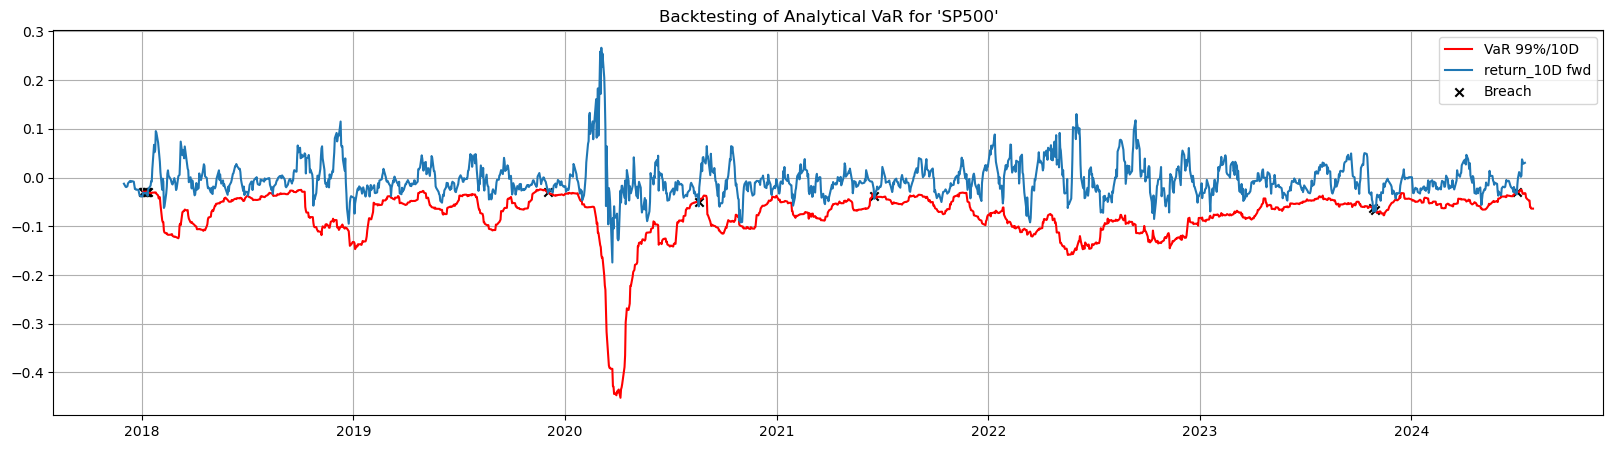

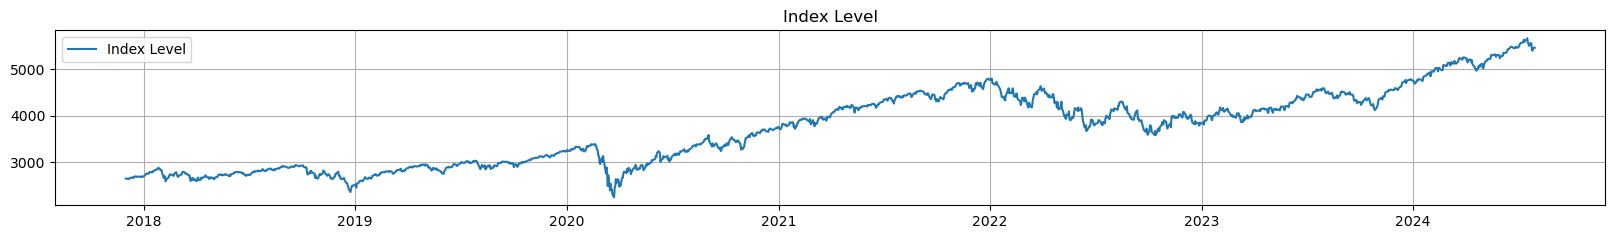

In [53]:
plt.title("Backtesting of Analytical VaR for 'SP500'");
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#fig, ax = plt.subplots()
#ax.set_xlim(0, 1009)
varPlt, = plt.plot(sp500_data.index, sp500_data['VaR_10D'], color='RED');
r10dplt, = plt.plot(sp500_data.index, sp500_data['Ret 10D']);
varBreachPlt = plt.scatter(sp500_data_breach.index, sp500_data_breach['VaR_10D'],color='BLACK', marker='x');
plt.legend(["VaR 99%/10D","return_10D fwd","Breach"]);
plt.grid()

fig = plt.figure();
ax1 = fig.add_subplot(211);
ax1.set_title('Index Level');
ax1.plot(sp500_data.index, sp500_data['Closing Price'])
ax1.legend(["Index Level"]);
ax1.grid();
plt.show();


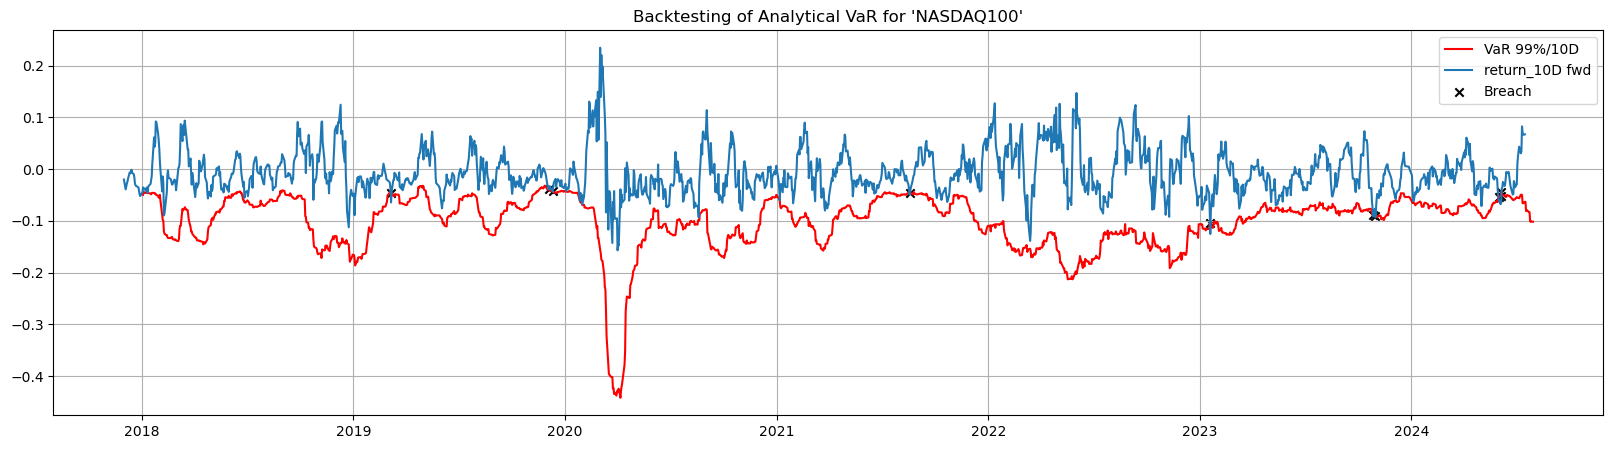

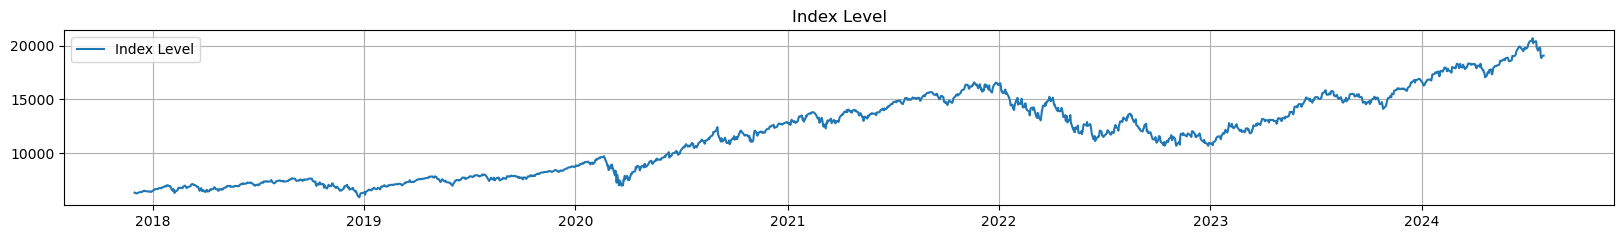

In [55]:
plt.title("Backtesting of Analytical VaR for 'NASDAQ100'");
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#fig, ax = plt.subplots()
#ax.set_xlim(0, 1009)
varPlt, = plt.plot(nasdaq100_data.index, nasdaq100_data['VaR_10D'], color='RED');
r10dplt, = plt.plot(nasdaq100_data.index, nasdaq100_data['Ret 10D']);
varBreachPlt = plt.scatter(nasdaq100_data_breach.index, nasdaq100_data_breach['VaR_10D'],color='BLACK', marker='x');
plt.legend(["VaR 99%/10D","return_10D fwd","Breach"]);
plt.grid()

fig = plt.figure();
ax1 = fig.add_subplot(211);
ax1.set_title('Index Level');
ax1.plot(nasdaq100_data.index, nasdaq100_data['Closing Price'])
ax1.legend(["Index Level"]);
ax1.grid();
plt.show();


During the initial phase of the COVID-19 pandemic from February to March 2020, the NASDAQ-100 and the S&P 500 both experienced significant volatility. 

Example Insights
For NASDAQ-100: Given its tech-heavy composition, the NASDAQ-100 likely saw more volatility during this period compared to the S&P 500. Backtesting might reveal more breaches for NASDAQ-100 if the VaR model wasn’t adequately accounting for the increased volatility and correlations during the pandemic.

For S&P 500: As a broader index, the S&P 500’s breaches might be fewer compared to NASDAQ-100 if the model better captured the risk dynamics of a more diversified index.

Conclusion
Backtesting VaR during periods of extreme market stress, like the early months of the COVID-19 pandemic, helps in assessing the robustness of risk models. You might find that VaR models, which worked well in stable times, could underperform in highly volatile periods. This can prompt adjustments in the risk management practices, such as incorporating more sophisticated models or increasing confidence levels to better capture extreme market conditions.

In [8]:
#squared returns
sp500_data['Squared_Return'] = sp500_data['LogReturn']**2
nasdaq100_data['Squared_Return'] = nasdaq100_data['LogReturn']**2

In [9]:
sp500_data.head()

,Closing Price,LogReturn,SD,Squared_Return
Date,,,,
2017-12-01,2642.219971,NaN,NaN,NaN
2017-12-04,2639.439941,-0.001053,NaN,1.108200e-06
2017-12-05,2629.570068,-0.003746,NaN,1.403544e-05
2017-12-06,2629.270020,-0.000114,NaN,1.302159e-08
2017-12-07,2636.979980,0.002928,NaN,8.573576e-06


In [10]:
nasdaq100_data.head()

,Closing Price,LogReturn,SD,Squared_Return
Date,,,,
2017-12-01,6337.870117,NaN,NaN,NaN
2017-12-04,6263.700195,-0.011772,NaN,1.385723e-04
2017-12-05,6265.109863,0.000225,NaN,5.063770e-08
2017-12-06,6293.049805,0.004450,NaN,1.979978e-05
2017-12-07,6316.279785,0.003685,NaN,1.357609e-05


In [11]:
lambda_value = 0.72

sp500_data['EWMA_Variance'] = sp500_data['Squared_Return'].ewm(span=(2/(1-lambda_value)-1)).mean()
nasdaq100_data['EWMA_Variance'] = nasdaq100_data['Squared_Return'].ewm(span=(2/(1-lambda_value)-1)).mean()

sp500_data['EWMA_StdDev'] = np.sqrt(sp500_data['EWMA_Variance'])
nasdaq100_data['EWMA_StdDev'] = np.sqrt(nasdaq100_data['EWMA_Variance'])

sp500_data['EWMA_VaR_10D'] = factor * sp500_data['EWMA_StdDev'] * np.sqrt(10)
nasdaq100_data['EWMA_VaR_10D'] = factor * nasdaq100_data['EWMA_StdDev'] * np.sqrt(10)

In [12]:
sp500_data.head()

,Closing Price,LogReturn,SD,Squared_Return,EWMA_Variance,EWMA_StdDev,EWMA_VaR_10D
Date,,,,,,,
2017-12-01,2642.219971,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,2639.439941,-0.001053,NaN,1.108200e-06,0.000001,0.001053,-0.007744
2017-12-05,2629.570068,-0.003746,NaN,1.403544e-05,0.000009,0.002937,-0.021604
2017-12-06,2629.270020,-0.000114,NaN,1.302159e-08,0.000005,0.002186,-0.016079
2017-12-07,2636.979980,0.002928,NaN,8.573576e-06,0.000006,0.002496,-0.018363


In [15]:
sp500_data['Ret 10D'] = np.log(sp500_data['Closing Price']) - np.log(sp500_data['Closing Price'].shift(-10))
nasdaq100_data['Ret 10D'] = np.log(nasdaq100_data['Closing Price']) - np.log(nasdaq100_data['Closing Price'].shift(-10))

In [16]:
sp500_data.head()

,Closing Price,LogReturn,SD,Squared_Return,EWMA_Variance,EWMA_StdDev,EWMA_VaR_10D,Ret 10D
Date,,,,,,,,
2017-12-01,2642.219971,NaN,NaN,NaN,NaN,NaN,NaN,-0.012633
2017-12-04,2639.439941,-0.001053,NaN,1.108200e-06,0.000001,0.001053,-0.007744,-0.019034
2017-12-05,2629.570068,-0.003746,NaN,1.403544e-05,0.000009,0.002937,-0.021604,-0.019545
2017-12-06,2629.270020,-0.000114,NaN,1.302159e-08,0.000005,0.002186,-0.016079,-0.018831
2017-12-07,2636.979980,0.002928,NaN,8.573576e-06,0.000006,0.002496,-0.018363,-0.017886


In [23]:
sp500_data['VaR_Breach_EWMA'] = sp500_data['Ret 10D'] < sp500_data['EWMA_VaR_10D']
nasdaq100_data['VaR_Breach_EWMA'] = nasdaq100_data['Ret 10D'] < nasdaq100_data['EWMA_VaR_10D']

nasdaq100_data.head(25)

,Closing Price,LogReturn,SD,Squared_Return,EWMA_Variance,EWMA_StdDev,EWMA_VaR_10D,Ret 10D,VaR_Breach,VaR_Breach_EWMA
Date,,,,,,,,,,
2017-12-01,6337.870117,NaN,NaN,NaN,NaN,NaN,NaN,-0.020064,False,False
2017-12-04,6263.700195,-0.011772,NaN,1.385723e-04,0.000139,0.011772,-0.086599,-0.039071,False,False
2017-12-05,6265.109863,0.000225,NaN,5.063770e-08,0.000058,0.007618,-0.056043,-0.033828,False,False
2017-12-06,6293.049805,0.004450,NaN,1.979978e-05,0.000041,0.006400,-0.047079,-0.028114,False,False
2017-12-07,6316.279785,0.003685,NaN,1.357609e-05,0.000030,0.005520,-0.040609,-0.024461,False,False
2017-12-08,6344.569824,0.004469,NaN,1.997114e-05,0.000027,0.005179,-0.038102,-0.018830,False,False
2017-12-11,6393.890137,0.007744,NaN,5.996283e-05,0.000038,0.006132,-0.045113,-0.006123,False,False
2017-12-12,6383.649902,-0.001603,NaN,2.569126e-06,0.000027,0.005167,-0.038014,-0.008035,False,False
2017-12-13,6394.669922,0.001725,NaN,2.974935e-06,0.000020,0.004421,-0.032520,-0.007284,False,False


In [24]:
sp500_data_breach1 = sp500_data[sp500_data['VaR_Breach_EWMA'] == True]
nasdaq100_data_breach1 = nasdaq100_data[nasdaq100_data['VaR_Breach_EWMA'] == True]
sp500_data_breach1

,Closing Price,LogReturn,SD,Squared_Return,EWMA_Variance,EWMA_StdDev,EWMA_VaR_10D,Ret 10D,VaR_Breach,VaR_Breach_EWMA
Date,,,,,,,,,,
2017-12-04,2639.439941,-0.001053,NaN,1.108200e-06,0.000001,0.001053,-0.007744,-0.019034,True,True
2017-12-06,2629.270020,-0.000114,NaN,1.302159e-08,0.000005,0.002186,-0.016079,-0.018831,True,True
2017-12-22,2683.340088,-0.000458,NaN,2.100129e-07,0.000010,0.003144,-0.023130,-0.025008,True,True
2017-12-26,2680.500000,-0.001059,NaN,1.121430e-06,0.000007,0.002724,-0.020038,-0.024954,True,True
2017-12-27,2682.620117,0.000791,NaN,6.250931e-07,0.000006,0.002347,-0.017268,-0.031172,True,True
2017-12-28,2687.540039,0.001832,NaN,3.357393e-06,0.000005,0.002215,-0.016293,-0.036067,True,True
2017-12-29,2673.610107,-0.005197,NaN,2.700499e-05,0.000011,0.003332,-0.024515,-0.037733,True,True
2018-01-02,2695.810059,0.008269,NaN,6.837765e-05,0.000027,0.005212,-0.038342,-0.038835,True,True
2018-01-10,2748.229980,-0.001113,0.003900,1.238426e-06,0.000013,0.003664,-0.026955,-0.032583,True,True


In [25]:
nasdaq100_data_breach1

,Closing Price,LogReturn,SD,Squared_Return,EWMA_Variance,EWMA_StdDev,EWMA_VaR_10D,Ret 10D,VaR_Breach,VaR_Breach_EWMA
Date,,,,,,,,,,
2017-12-22,6465.169922,-0.001162,NaN,1.351366e-06,0.000017,0.004098,-0.030151,-0.032380,True,True
2017-12-26,6433.160156,-0.004963,NaN,2.463541e-05,0.000019,0.004359,-0.032069,-0.035053,True,True
2017-12-27,6435.149902,0.000309,NaN,9.563399e-08,0.000014,0.003700,-0.027219,-0.041599,True,True
2017-12-28,6441.419922,0.000974,NaN,9.484129e-07,0.000010,0.003180,-0.023394,-0.048058,True,True
2017-12-29,6396.419922,-0.007011,NaN,4.914787e-05,0.000021,0.004590,-0.033763,-0.051897,True,True
2018-01-11,6708.490234,0.006855,0.006249,4.699234e-05,0.000038,0.006158,-0.045303,-0.045812,True,True
2018-05-22,6893.620117,-0.001726,0.009803,2.979579e-06,0.000030,0.005455,-0.040133,-0.044884,True,True
2018-05-29,6926.540039,-0.004951,0.007528,2.451461e-05,0.000023,0.004825,-0.035498,-0.039995,True,True
2018-05-31,6967.729980,-0.001239,0.007026,1.535749e-06,0.000023,0.004781,-0.035173,-0.043785,True,True


In [26]:
num_observations = sp500_data['VaR_Breach_EWMA'].count()

# Number of breaches
num_breaches = sp500_data['VaR_Breach_EWMA'].sum()

# Percentage of breaches
percentage_breach = (num_breaches / num_observations) * 100

# Display the results
print('SP_500 Results:')
print(f'Number of observations: {num_observations}')
print(f'Number of VaR breaches: {num_breaches}')
print(f'Percentage of breaches: {percentage_breach:.2f}%')

SP_500 Results:
Number of observations: 1673
Number of VaR breaches: 28
Percentage of breaches: 1.67%


In [27]:
num_observations = nasdaq100_data['VaR_Breach_EWMA'].count()

# Number of breaches
num_breaches = nasdaq100_data['VaR_Breach_EWMA'].sum()

# Percentage of breaches
percentage_breach = (num_breaches / num_observations) * 100

# Display the results
print('NASDAQ-1000 Results:')
print(f'Number of observations: {num_observations}')
print(f'Number of VaR breaches: {num_breaches}')
print(f'Percentage of breaches: {percentage_breach:.2f}%')

NASDAQ-1000 Results:
Number of observations: 1673
Number of VaR breaches: 33
Percentage of breaches: 1.97%


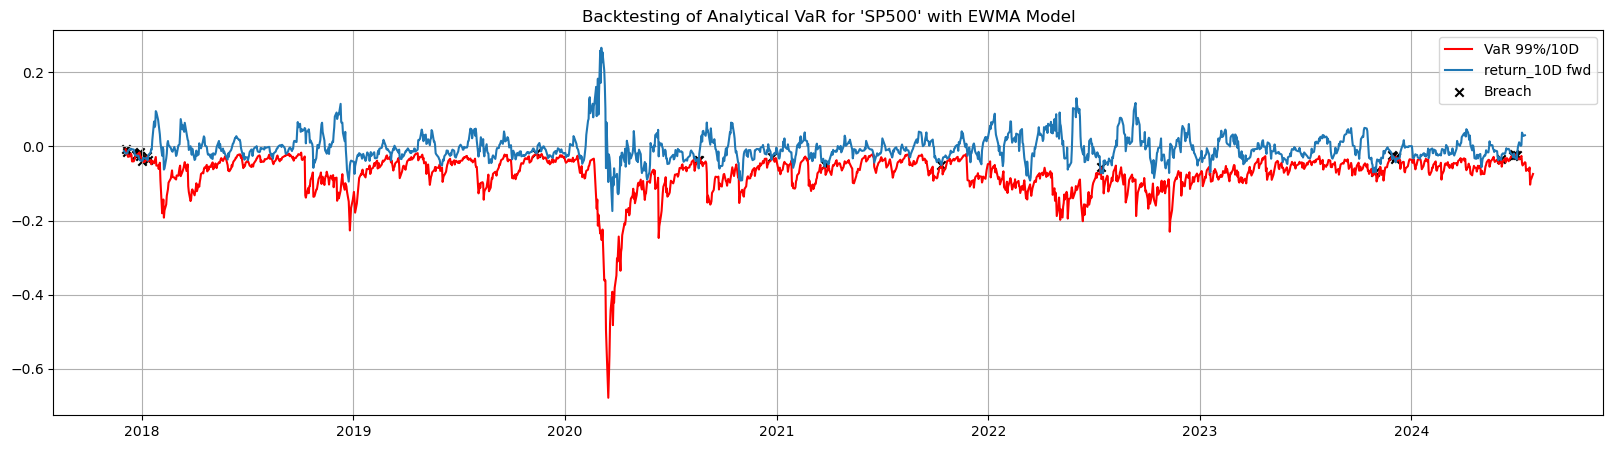

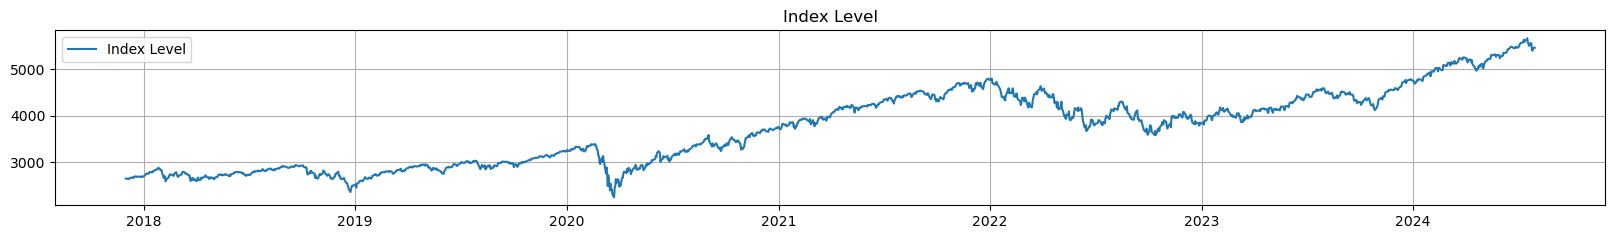

In [31]:
plt.title("Backtesting of Analytical VaR for 'SP500' with EWMA Model");
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#fig, ax = plt.subplots()
#ax.set_xlim(0, 1009)
varPlt, = plt.plot(sp500_data.index, sp500_data['EWMA_VaR_10D'], color='RED');
r10dplt, = plt.plot(sp500_data.index, sp500_data['Ret 10D']);
varBreachPlt = plt.scatter(sp500_data_breach1.index, sp500_data_breach1['EWMA_VaR_10D'],color='BLACK', marker='x');
plt.legend(["VaR 99%/10D","return_10D fwd","Breach"]);
plt.grid()

fig = plt.figure();
ax1 = fig.add_subplot(211);
ax1.set_title('Index Level');
ax1.plot(sp500_data.index, sp500_data['Closing Price'])
ax1.legend(["Index Level"]);
ax1.grid();
plt.show();

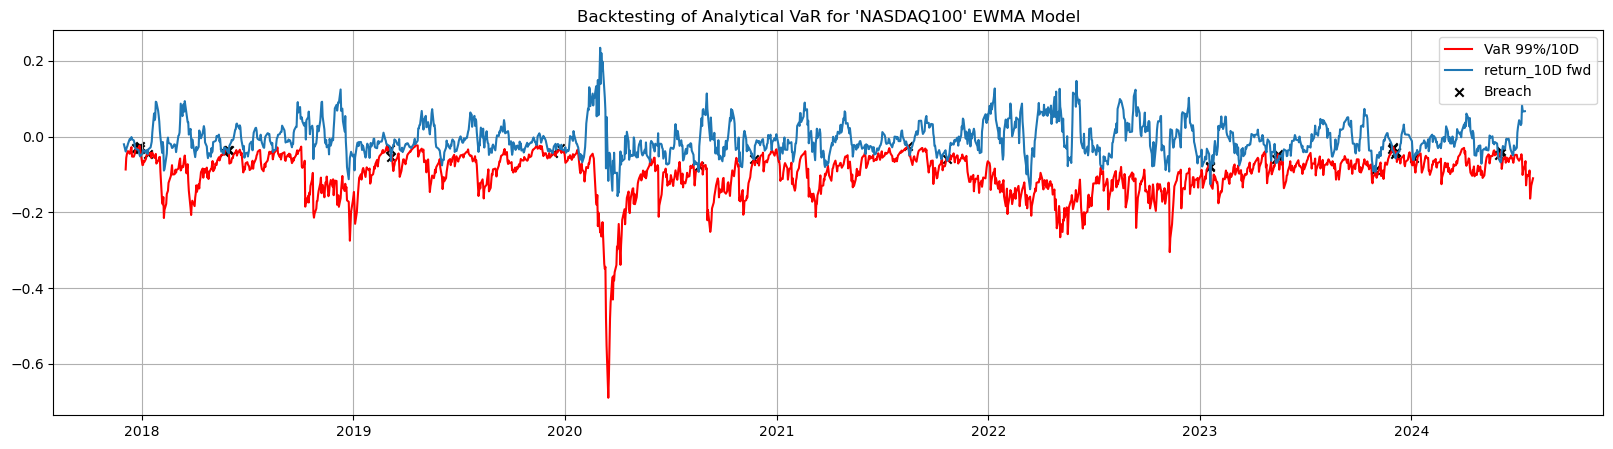

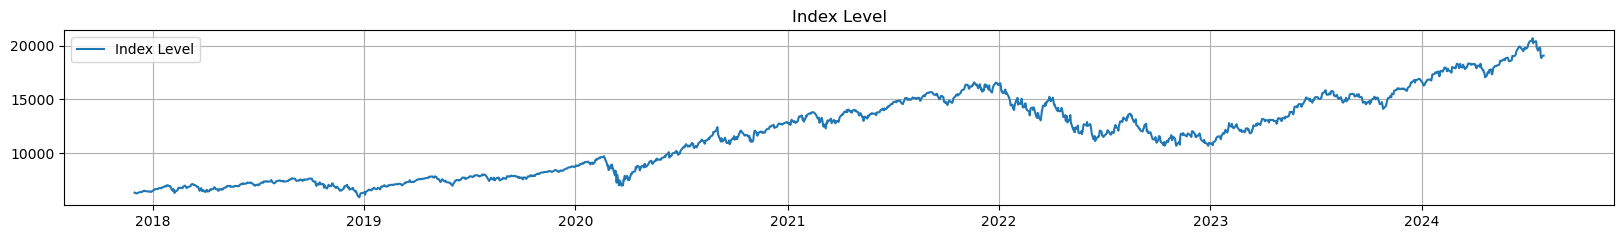

In [32]:
plt.title("Backtesting of Analytical VaR for 'NASDAQ100' EWMA Model");
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#fig, ax = plt.subplots()
#ax.set_xlim(0, 1009)
varPlt, = plt.plot(nasdaq100_data.index, nasdaq100_data['EWMA_VaR_10D'], color='RED');
r10dplt, = plt.plot(nasdaq100_data.index, nasdaq100_data['Ret 10D']);
varBreachPlt = plt.scatter(nasdaq100_data_breach1.index, nasdaq100_data_breach1['EWMA_VaR_10D'],color='BLACK', marker='x');
plt.legend(["VaR 99%/10D","return_10D fwd","Breach"]);
plt.grid()

fig = plt.figure();
ax1 = fig.add_subplot(211);
ax1.set_title('Index Level');
ax1.plot(nasdaq100_data.index, nasdaq100_data['Closing Price'])
ax1.legend(["Index Level"]);
ax1.grid();
plt.show();